In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasmovdyant","key":"4d4759066dca189587bcac8981b34740"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jeremylarcher/canadian-house-prices-for-top-cities

Dataset URL: https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities
License(s): apache-2.0
  0% 0.00/448k [00:00<?, ?B/s]
100% 448k/448k [00:00<00:00, 60.9MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip ('/content/canadian-house-prices-for-top-cities.zip')

/bin/bash: -c: line 1: syntax error near unexpected token `'/content/canadian-house-prices-for-top-cities.zip''
/bin/bash: -c: line 1: `unzip ('/content/canadian-house-prices-for-top-cities.zip')'


In [ ]:
df = pd.read_csv('/content/canadian-house-prices-for-top-cities.zip', encoding='latin-1')

In [ ]:
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Number_Beds'}>,
        <Axes: title={'center': 'Number_Baths'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Median_Family_Income'}>, <Axes: >,
        <Axes: >]], dtype=object)

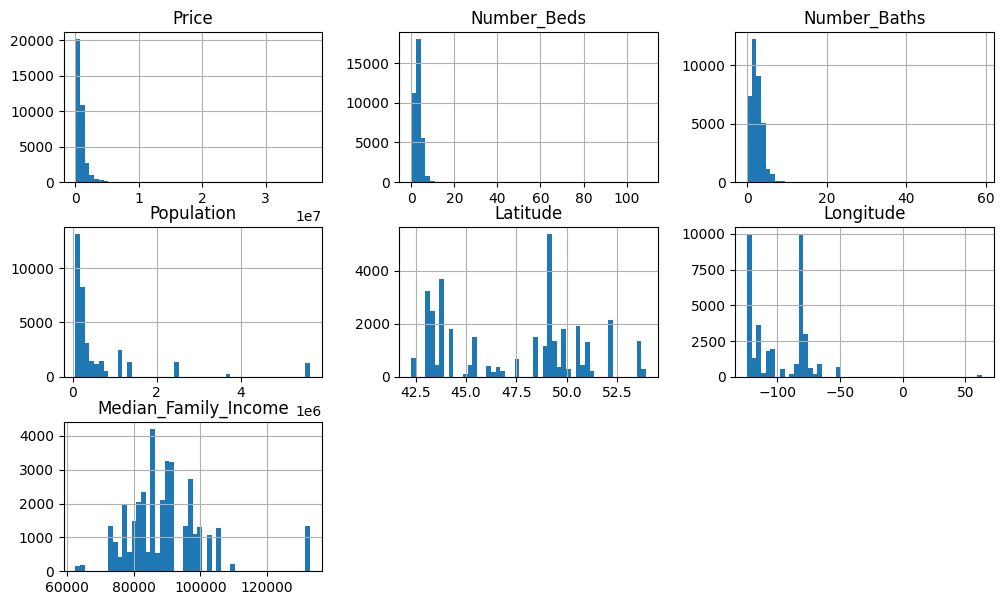

In [ ]:
df.hist(bins=50, figsize=(12,7))

In [ ]:
df['Price'] = np.log(df['Price'])
# df['Number_Beds'] = np.log(df['Number_Beds'])
# df['Population'] = np.log(df['Population'])
# df['Number_Baths'] = np.log(df['Number_Baths'])

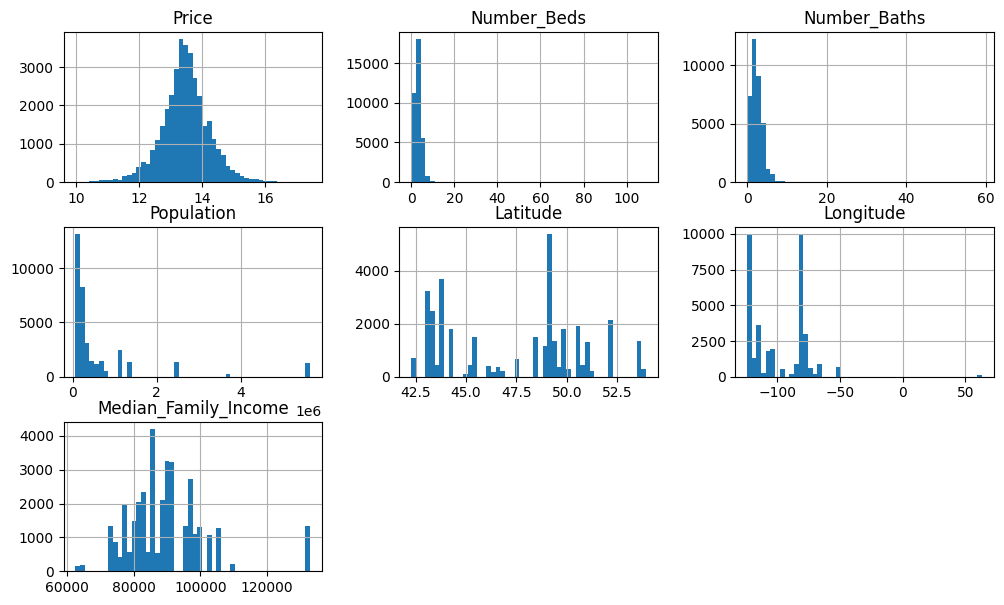

In [ ]:
df.hist(bins=50, figsize=(12,7))
plt.show()

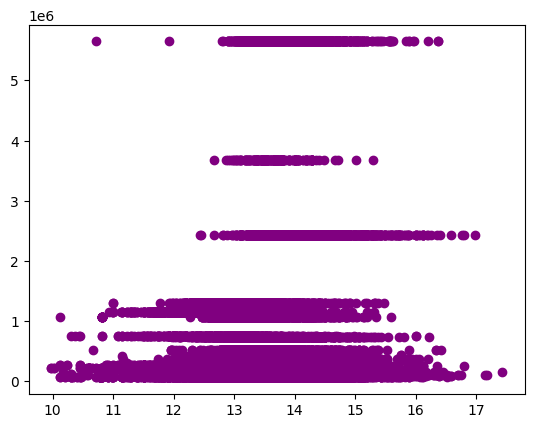

In [ ]:
plt.scatter(df['Price'], df['Population'], c= 'purple')

In [ ]:
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,35768.000000,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,13.462207,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,0.750341,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,9.975808,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,13.038764,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,13.457406,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,13.906265,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,17.426428,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [ ]:
df.isna().sum()

,0
City,0
Price,0
Address,0
Number_Beds,0
Number_Baths,0
Province,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


In [ ]:
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,13.566921,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,13.592366,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,13.592242,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,13.997832,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,13.413240,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,12.994303,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,15.759991,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,12.947772,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,13.764112,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


array([[<Axes: xlabel='Median_Family_Income', ylabel='Median_Family_Income'>,
        <Axes: xlabel='Longitude', ylabel='Median_Family_Income'>,
        <Axes: xlabel='Price', ylabel='Median_Family_Income'>,
        <Axes: xlabel='Population', ylabel='Median_Family_Income'>],
       [<Axes: xlabel='Median_Family_Income', ylabel='Longitude'>,
        <Axes: xlabel='Longitude', ylabel='Longitude'>,
        <Axes: xlabel='Price', ylabel='Longitude'>,
        <Axes: xlabel='Population', ylabel='Longitude'>],
       [<Axes: xlabel='Median_Family_Income', ylabel='Price'>,
        <Axes: xlabel='Longitude', ylabel='Price'>,
        <Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Population', ylabel='Price'>],
       [<Axes: xlabel='Median_Family_Income', ylabel='Population'>,
        <Axes: xlabel='Longitude', ylabel='Population'>,
        <Axes: xlabel='Price', ylabel='Population'>,
        <Axes: xlabel='Population', ylabel='Population'>]], dtype=object)

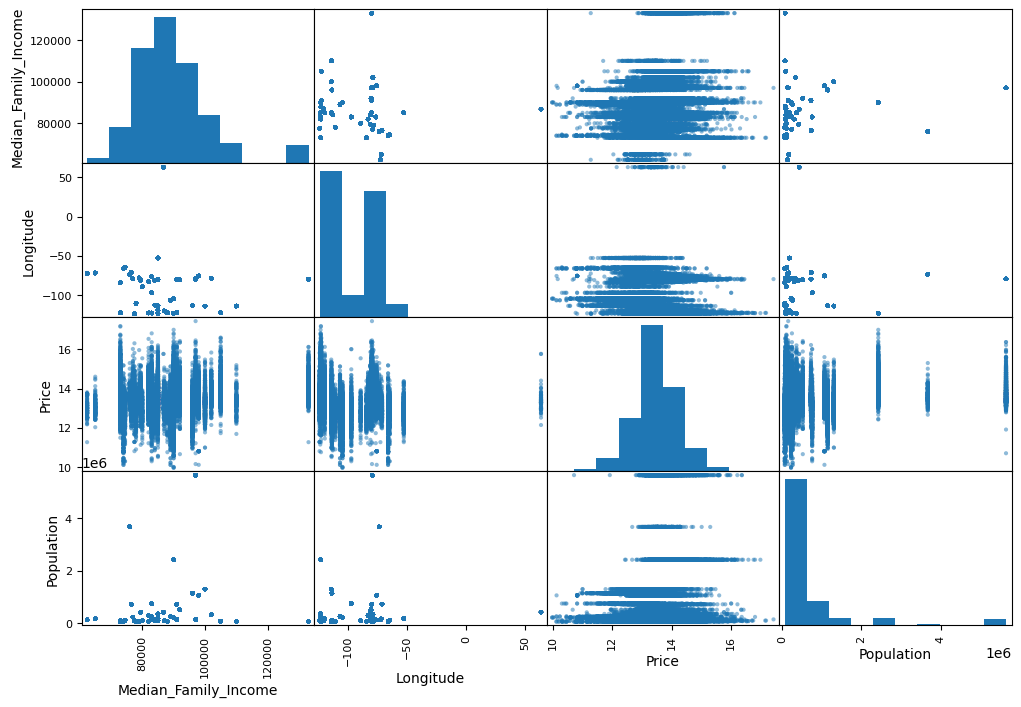

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Median_Family_Income', 'Longitude', 'Price', 'Population']
scatter_matrix(df[attributes], figsize = (12,8))


Machine Learning

In [ ]:
df.isna().sum()

,0
City,0
Price,0
Address,0
Number_Beds,0
Number_Baths,0
Province,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


In [ ]:
df=df.drop('Address', axis=1)
df=df.drop('City', axis=1)

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price'].copy()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='median')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
onehot = OneHotEncoder(sparse_output=False)

In [ ]:
one_hot_results = onehot.fit_transform(pd.DataFrame(df['Province']))

In [ ]:
columns_names = onehot.get_feature_names_out()

In [ ]:
ocean_df = pd.DataFrame(one_hot_results, columns = columns_names)
ocean_df

,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
35763,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35764,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35765,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35766,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
pd.concat([df, ocean_df], axis = 1)

,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,13.566921,3,2,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13.592366,3,1,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,13.592242,2,2,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.997832,4,2,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,13.413240,1,1,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35763,12.994303,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35764,15.759991,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35765,12.947772,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35766,13.764112,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
final_df = pd.concat([df, ocean_df], axis = 1,)
final_df = final_df.drop('Province', axis=1)

In [ ]:
X = final_df

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(y_test)

(28614, 7154)

In [ ]:
X_train

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
4351,13.217674,4,2,1151635,53.5344,-113.4903,96000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18967,14.077875,4,3,181380,49.8881,-119.4956,85000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24897,14.237505,3,2,106079,49.1642,-123.9364,77500.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5916,13.676134,3,3,1068821,45.4247,-75.6950,98000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10822,13.399844,5,2,242460,43.1833,-79.2333,77000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,13.737441,3,3,226404,50.4547,-104.6067,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6265,13.303017,2,2,1068821,45.4247,-75.6950,98000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11284,13.369048,3,2,242460,43.1833,-79.2333,77000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,13.627975,2,1,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_train

,Price
4351,13.217674
18967,14.077875
24897,14.237505
5916,13.676134
10822,13.399844
...,...
16850,13.737441
6265,13.303017
11284,13.369048
860,13.627975


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28614, 16), (7154, 16), (28614,), (7154,))

In [ ]:
print(X_train.isnull().sum())  # X_train-də boş dəyərləri yoxla
print(y_train.isnull().sum())  # y_train-də boş dəyərləri yoxla

Price                                 0
Number_Beds                           0
Number_Baths                          0
Population                            0
Latitude                              0
Longitude                             0
Median_Family_Income                  0
Province_Alberta                      0
Province_British Columbia             0
Province_Manitoba                     0
Province_New Brunswick                0
Province_Newfoundland and Labrador    0
Province_Nova Scotia                  0
Province_Ontario                      0
Province_Quebec                       0
Province_Saskatchewan                 0
dtype: int64
0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rfr.score(X_train,y_train)

0.9999976363578276

In [ ]:
rfr.score(X_test, y_test)

0.99999599331767

In [ ]:
preds = pd.DataFrame(rfr.predict(X_test))
preds

,0
0,14.603513
1,13.741864
2,14.648353
3,14.575876
4,13.112022
...,...
7149,15.359008
7150,12.180393
7151,12.556113
7152,14.345550
